In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("blood-transfusion-service-center.csv",sep=",")
df.dropna(how='any', inplace=True)
df.dropna(how='any', inplace=True)
df


,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
...,...,...,...,...,...
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1


In [15]:
df.groupby(["V1","V2"]).count()

V3  V4  Class
V1 V2               
0  2    1   1      1
   3    1   1      1
   8    1   1      1
   13   1   1      1
   26   1   1      1
...    ..  ..    ...
38 1    2   2      2
39 1    1   1      1
40 1    1   1      1
72 1    1   1      1
74 1    1   1      1

[188 rows x 3 columns]

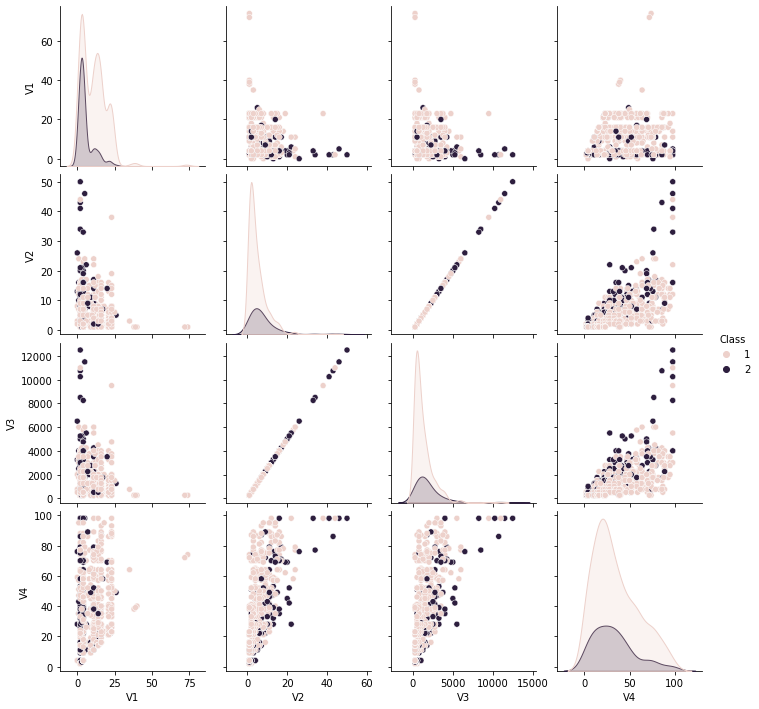

In [16]:
pairplot_figure=sns.pairplot(df,hue="Class") 


In [18]:
features_df=df.iloc[:,0:4]
print(features_df)
target_df=df.iloc[:,4]
print(target_df)

     V1  V2     V3  V4
0     2  50  12500  98
1     0  13   3250  28
2     1  16   4000  35
3     2  20   5000  45
4     1  24   6000  77
..   ..  ..    ...  ..
743  23   2    500  38
744  21   2    500  52
745  23   3    750  62
746  39   1    250  39
747  72   1    250  72

[748 rows x 4 columns]
0      2
1      2
2      2
3      2
4      1
      ..
743    1
744    1
745    1
746    1
747    1
Name: Class, Length: 748, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_df,target_df,train_size=0.3,random_state=1 )
x_train #du kannst anderen auch sehen

,V1,V2,V3,V4
458,21,1,250,21
465,21,5,1250,60
163,2,1,250,2
167,2,1,250,2
145,4,3,750,16
...,...,...,...,...
645,14,2,500,14
715,16,5,1250,71
72,4,17,4250,71
235,8,10,2500,63


In [24]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)

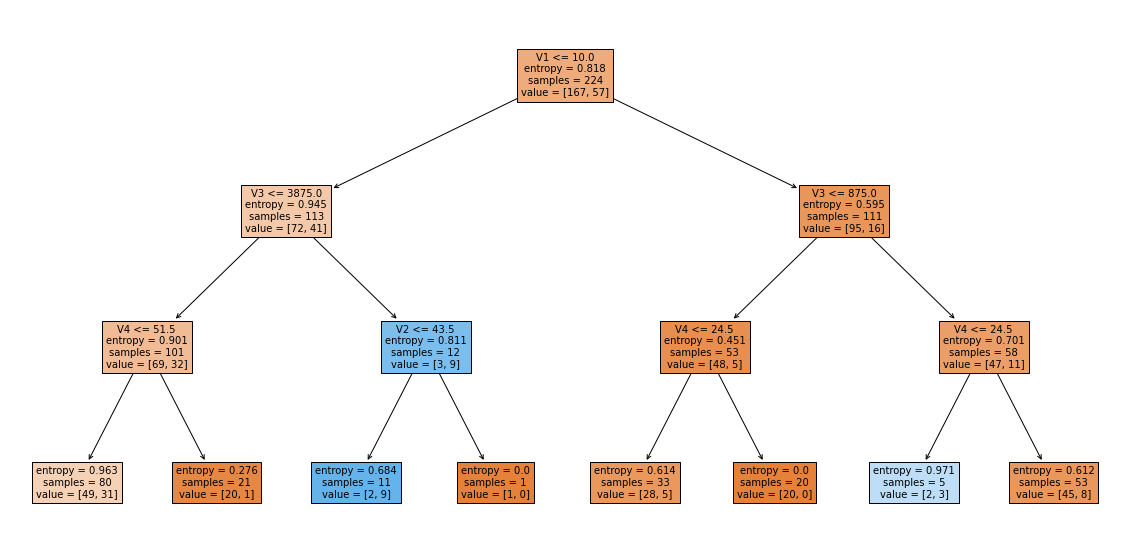

In [27]:
clf=clf.fit(x_train, y_train)
plt.figure(figsize=(20,10))
t=tree.plot_tree(clf,fontsize=10,feature_names=x_test.columns,filled=True)

In [28]:
y_pred=clf.predict(x_test)

#Voraussagewerte und vorgegebene Werte vergleichen


KorrV=0
anz=len(y_test)
for(yt,yp) in list(zip(y_test,y_pred)):
    
    if yt==yp:
        
        print("OK!     Testdaten: ",yt,"    /    Voraussage: ",yp)
        KorrV+=1
    else:
        print("FALSCH! Testdaten:", yt,"    /    Voraussage: ",yp)
        
print("Von{0} Voraussagen treffen {1} zu. Das sind {2:3.0f} Prozent".format(anz,KorrV,100*KorrV/anz))

FALSCH! Testdaten: 2     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage

OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
FALSCH! Testdaten: 2     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussage:  1
OK!     Testdaten:  1     /    Voraussa

In [29]:
from sklearn import metrics
print("Genauigkeit:", metrics.accuracy_score(y_test,y_pred))

Genauigkeit: 0.7652671755725191
